In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('D600_Task3_Dataset1_Housing_Information.csv')

# Print the first few rows of the DataFrame to verify it loaded correctly
df.head()

In [53]:
#Task 3 - D2

import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('D600_Task3_Dataset1_Housing_Information.csv')

# Define your continuous features and target
continuous_vars = [
    'SquareFootage', 'NumBathrooms', 'NumBedrooms', 'BackyardSpace',
    'CrimeRate', 'SchoolRating', 'AgeOfHome', 'DistanceToCityCenter',
    'PropertyTaxRate', 'RenovationQuality', 'LocalAmenities',
    'TransportAccess', 'PreviousSalePrice'
]

# Separate input features (X) and target (y)
X = df[continuous_vars]
y = df['Price']

# Standardize the continuous features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=continuous_vars)

# Add the target variable back in
X_scaled_df['Price'] = y.values

# Print the first few rows of the standardized DataFrame
X_scaled_df.head()

,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,PropertyTaxRate,RenovationQuality,LocalAmenities,TransportAccess,PreviousSalePrice,Price
0,-1.132277,-1.187828,0.970213,0.957151,-0.591776,-0.700696,-0.230889,-0.615042,0.681094,-0.037232,-0.562349,-0.733870,-0.552700,255614.8992
1,0.993926,-1.187828,-0.986989,0.516683,-0.865854,-0.695399,-0.197846,-0.797175,-1.104064,-0.468641,-0.140939,0.433066,-1.262469,155586.0947
2,-1.171293,-0.369602,-0.008388,0.868372,-1.040621,1.195478,0.049814,0.521008,0.741268,-0.377284,0.803473,1.277560,-1.271312,131050.8324
3,-0.251508,-0.100938,-0.986989,-0.256932,-0.499677,0.072604,1.506508,-1.019229,-0.101167,-0.280851,-0.351644,0.146450,-1.076429,151361.7125
4,-1.171293,-1.119960,-0.008388,-0.566178,-1.273088,-0.536502,-0.943973,2.133599,-0.482268,-0.834070,-0.178565,0.514957,-1.408430,113167.6128


In [ ]:
# Export to CSV
X_scaled_df.to_csv('D600_Task3_StandardizedDataset.csv', index=False)

print("Export complete: D600_Task3_StandardizedDataset.csv")

In [54]:
# Check the mean and standard deviation of the standardized features

print(X_scaled_df[continuous_vars].mean())   # all ≈ 0
print(X_scaled_df[continuous_vars].std())    # all = 1

SquareFootage           0.000000e+00
NumBathrooms            1.299278e-16
NumBedrooms             1.624098e-16
BackyardSpace          -1.624098e-17
CrimeRate               2.030122e-16
SchoolRating           -6.171571e-16
AgeOfHome              -4.060244e-17
DistanceToCityCenter    3.248195e-16
PropertyTaxRate        -3.491810e-16
RenovationQuality      -2.273737e-16
LocalAmenities         -2.760966e-16
TransportAccess         1.624098e-17
PreviousSalePrice      -2.598556e-16
dtype: float64
SquareFootage           1.000071
NumBathrooms            1.000071
NumBedrooms             1.000071
BackyardSpace           1.000071
CrimeRate               1.000071
SchoolRating            1.000071
AgeOfHome               1.000071
DistanceToCityCenter    1.000071
PropertyTaxRate         1.000071
RenovationQuality       1.000071
LocalAmenities          1.000071
TransportAccess         1.000071
PreviousSalePrice       1.000071
dtype: float64


In [ ]:
#Task 3 - D3 (Descriptive Statistics)

# Select variables for descriptive stats (original values)
vars_for_stats = continuous_vars + ['Price']  # Add target

# Get summary statistics
desc_stats = df[vars_for_stats].describe().T

# Add range for clarity
desc_stats["range"] = desc_stats["max"] - desc_stats["min"]

# Display and optionally round
desc_stats = desc_stats[["count", "mean", "std", "min", "25%", "50%", "75%", "max", "range"]].round(2)

desc_stats



In [55]:
#Task 3 - Part E1 (PCA)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA on standardized continuous variables
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [56]:
# Display the first few rows of the PCA-transformed data
pd.DataFrame(X_pca).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.017542,-0.344499,-0.938975,0.888809,0.674594,1.572659,-0.440548,-0.637625,-0.431768,-0.218902,-0.173996,0.905325,0.099061
1,-0.801700,0.660203,-1.793858,-0.740459,0.318829,-0.798685,0.280913,-1.427949,0.600463,0.001214,0.448818,0.143939,-0.708985
2,-0.399100,1.850990,-0.489027,1.113820,1.495376,0.556333,-0.224910,0.605211,-0.140655,0.876763,0.349823,-0.815651,-0.174861
3,-1.002564,0.087202,-0.344077,0.072011,0.582236,-1.027975,0.890457,-0.739057,-1.209363,0.714733,0.370815,-0.174462,-0.239492
4,-1.996255,1.067094,-0.949899,1.358315,0.260595,-0.500551,-0.991190,1.247493,1.498614,-0.385505,0.477751,0.252241,-0.305358


In [57]:
# Create a DataFrame with PCA components (version with column names)
pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-1.017542,-0.344499,-0.938975,0.888809,0.674594,1.572659,-0.440548,-0.637625,-0.431768,-0.218902,-0.173996,0.905325,0.099061
1,-0.801700,0.660203,-1.793858,-0.740459,0.318829,-0.798685,0.280913,-1.427949,0.600463,0.001214,0.448818,0.143939,-0.708985
2,-0.399100,1.850990,-0.489027,1.113820,1.495376,0.556333,-0.224910,0.605211,-0.140655,0.876763,0.349823,-0.815651,-0.174861
3,-1.002564,0.087202,-0.344077,0.072011,0.582236,-1.027975,0.890457,-0.739057,-1.209363,0.714733,0.370815,-0.174462,-0.239492
4,-1.996255,1.067094,-0.949899,1.358315,0.260595,-0.500551,-0.991190,1.247493,1.498614,-0.385505,0.477751,0.252241,-0.305358


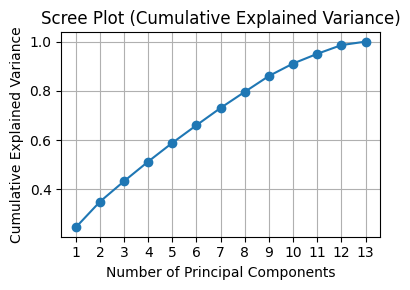

In [58]:
# Task 3 - Part E2 (PCA - Scree Plot)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree Plot – cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(4, 3))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title('Scree Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(1, len(cumulative_variance)+1))
plt.tight_layout()
plt.savefig("PCA_ScreePlot_Task3.png")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})
explained_variance_df

In [ ]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining ≥95% variance: {n_components_95}")


In [59]:
# Task 3 - Part F1 (Train/Test Split)
from sklearn.model_selection import train_test_split

# Use all principal components
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
y = df['Price']  # Original target variable

# Split into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=42)

# Optionally save to CSVs
X_train.to_csv("D600_Task3_TrainSet_X.csv", index=False)
X_test.to_csv("D600_Task3_TestSet_X.csv", index=False)
y_train.to_csv("D600_Task3_TrainSet_y.csv", index=False)
y_test.to_csv("D600_Task3_TestSet_y.csv", index=False)

print("Train/Test datasets created and exported.")


Train/Test datasets created and exported.


In [60]:
# Task 3 - Part F2 (Linear Regression Model)

import statsmodels.api as sm

# Add constant (intercept) to training data
X_train_const = sm.add_constant(X_train)

# Fit linear regression model using statsmodels
model = sm.OLS(y_train, X_train_const).fit()

# Summarize model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     1027.
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:44:52   Log-Likelihood:                -71319.
No. Observations:                5600   AIC:                         1.427e+05
Df Residuals:                    5586   BIC:                         1.428e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.076e+05   1099.892    279.677      0.0

In [ ]:
# Display coefficients
model.params

In [ ]:
# Display p-values
model.pvalues

In [61]:
# Task 3 - Part F3 (MSE on Training Set)

from sklearn.metrics import mean_squared_error

# Predict on the training data using the fitted model
y_train_pred = model.predict(X_train_const)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training Set MSE: {mse_train:.2f}")

Training Set MSE: 6753208753.04


In [62]:
# Task 3 - F4 (MSE on Test Set)

# Add constant to test set
X_test_const = sm.add_constant(X_test)

# Predict on the test set
y_test_pred = model.predict(X_test_const)

# Calculate MSE for test set

from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test Set MSE: {mse_test:.2f}")

Test Set MSE: 6726053514.61
